# Решающие деревья и случайные леса(часть 2)

**Коптев Данил**

##Задание 3

1. Используя модуль datasets библиотеки Scikit-learn сгенерировать модельный набор данных  для  задачи  многоклассовой  классификации  с  двумя  информативными признаками  и  числом  классов,  равным  трем.  Обеспечить  воспроизводимость результатов.

In [378]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers = 3, n_features=2, random_state = 42, cluster_std = 2)

# Вывод размерности массива признаков и массива ответов
print("Размерность массива признаков:", X.shape)
print("Размерность массива ответов:", y.shape)

Размерность массива признаков: (100, 2)
Размерность массива ответов: (100,)


2. Выполнить  визуализацию  сгенерированных  облаков  точек  (точки,  отображающие объекты разных классов, должны быть выведены разными цветами).

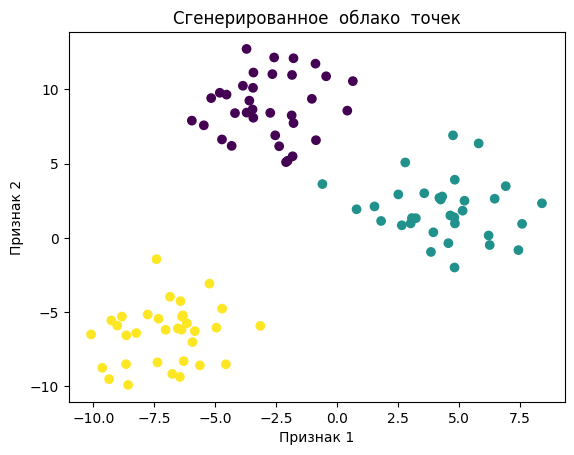

In [379]:
import matplotlib.pyplot as plt
from sklearn import tree 

# Визуализация облака точек
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Сгенерированное  облако  точек')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

3.Выполнить разбиение набора данных, полученного в п. 1, на обучающую и тестовую выборки в соотношении 70/30.

In [380]:
from sklearn.model_selection import train_test_split

# Разбиение набора данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Вывод размерности массивов обучающей и тестовой выборок
print("Размерность массива обучающей выборки:", X_train.shape)
print("Размерность массива тестовой выборки:", X_test.shape)

Размерность массива обучающей выборки: (70, 2)
Размерность массива тестовой выборки: (30, 2)


4. Создать модель решающего дерева с параметрами по умолчанию (обеспечивтолько воспроизводимость  результатов)  и  обучить  ее  на  обучающей  выборке.  Обратить внимание на значения параметров, управляющих сложностью деревьев.

In [381]:
from sklearn.tree import DecisionTreeClassifier

# Создание модели решающего дерева
clf = DecisionTreeClassifier(random_state=42)

# Обучение модели на обучающей выборке
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

5. Получить предсказания обученной модели для объектов тестовой выборки. Оценить качество классификации с помощью метрики accuracyкак на обучающей, так и на тестовой выборке; дать интерпретацию полученных оценок.

In [382]:
# Получение предсказаний обученной модели для объектов тестовой выборки
y_pred = clf.predict(X_test)
y_pred

array([2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 1, 1, 2, 2, 0, 0, 2])

In [383]:
from sklearn.metrics import accuracy_score

# Оценка качества классификации на обучающей выборке
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Точность классификации на обучающей выборке:", train_accuracy)

# Оценка качества классификации на тестовой выборке
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Точность классификации на тестовой выборке:", test_accuracy)

Точность классификации на обучающей выборке: 1.0
Точность классификации на тестовой выборке: 1.0


Таким образом, можно сделать вывод, что модель решающего дерева работает корректно

6. Изучить зависимость обобщающей способности модели от глубины дерева. Для этого выполнить следующие действия.

1) Создать модель решающего дерева глубиной 1 и обучить ее на обучающей выборке. Получить предсказанные моделью метки классов для объектов обучающей и тестовой выборок.  Оценить  качество  классификации  с  помощью  метрики accuracyна обучающей и тестовой выборках.

In [384]:
# Создание модели решающего дерева глубиной 1
clf = DecisionTreeClassifier(max_depth=1, random_state=42)

# Обучение модели на обучающей выборке
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [385]:
# Получение предсказаний обученной модели для объектов тестовой выборки
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0])

In [386]:
# Оценка качества классификации на обучающей выборке
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Точность классификации на обучающей выборке:", train_accuracy)

# Оценка качества классификации на тестовой выборке
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Точность классификации на тестовой выборке:", test_accuracy)

Точность классификации на обучающей выборке: 0.7142857142857143
Точность классификации на тестовой выборке: 0.5333333333333333


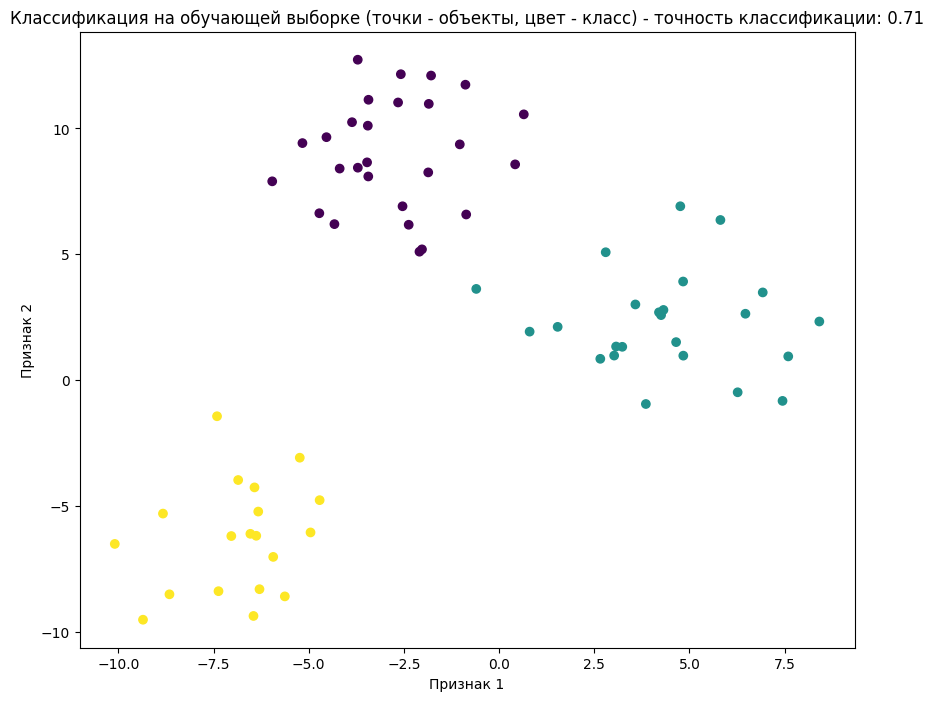

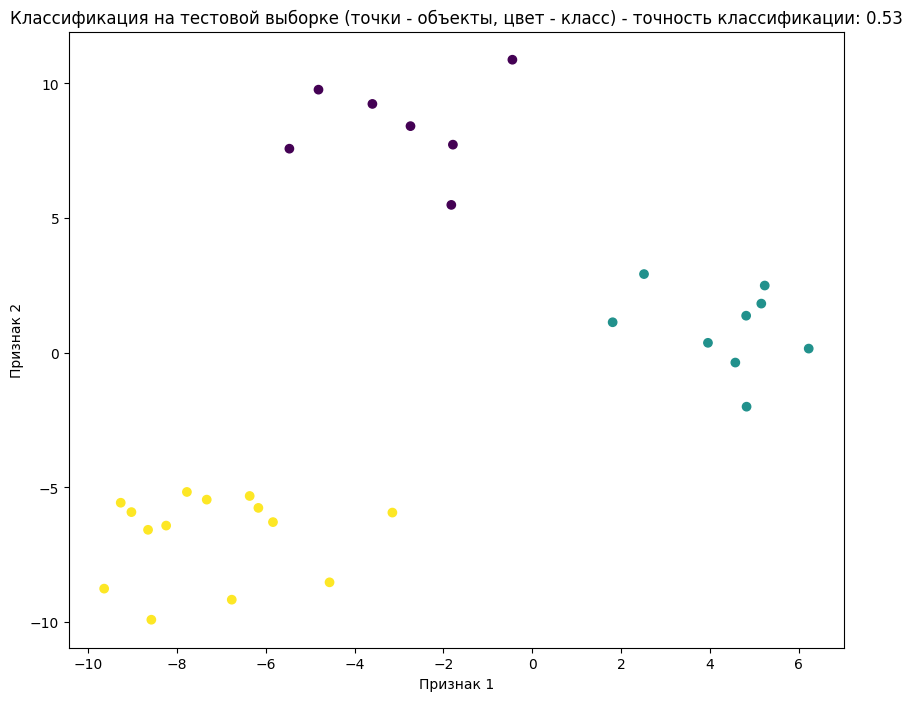

In [387]:
import numpy as np

# Визуализация результатов классификации на обучающей выборке
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Классификация на обучающей выборке (точки - объекты, цвет - класс) - точность классификации: {:.2f}'.format(train_accuracy))
plt.show()

# Визуализация результатов классификации на тестовой выборке
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Классификация на тестовой выборке (точки - объекты, цвет - класс) - точность классификации: {:.2f}'.format(test_accuracy))
plt.show()
# Динамически закрасить не получилось...

[Text(0.5, 0.75, 'x[0] <= 0.726\ngini = 0.66\nsamples = 70\nvalue = [27, 24, 19]'),
 Text(0.25, 0.25, 'gini = 0.506\nsamples = 47\nvalue = [27, 1, 19]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]')]

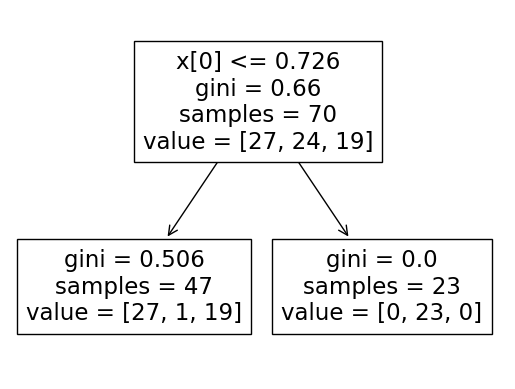

In [388]:
tree.plot_tree(clf)

Точность классификации на обучающей выборке составила 71.43%, а на тестовой выборке - 53.33%.

Модель решающего дерева с параметром max_depth=1 и random_state=42 показала хорошие результаты на обучающей выборке, но не показала идеальные результаты на тестовой выборке, что говорит о переобучение модели

3) Создать модель решающего дерева глубиной 2 и повторить с ней все действия, описанные для дерева глубины 1.

In [389]:
# Создание модели решающего дерева глубиной 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Обучение модели на обучающей выборке
clf.fit(X_train, y_train)

# Получение предсказаний для тестовой выборки
y_pred = clf.predict(X_test)

# Оценка качества классификации на обучающей выборке
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Точность классификации на обучающей выборке:", train_accuracy)

# Оценка качества классификации на тестовой выборке
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Точность классификации на тестовой выборке:", test_accuracy)

Точность классификации на обучающей выборке: 0.9857142857142858
Точность классификации на тестовой выборке: 1.0


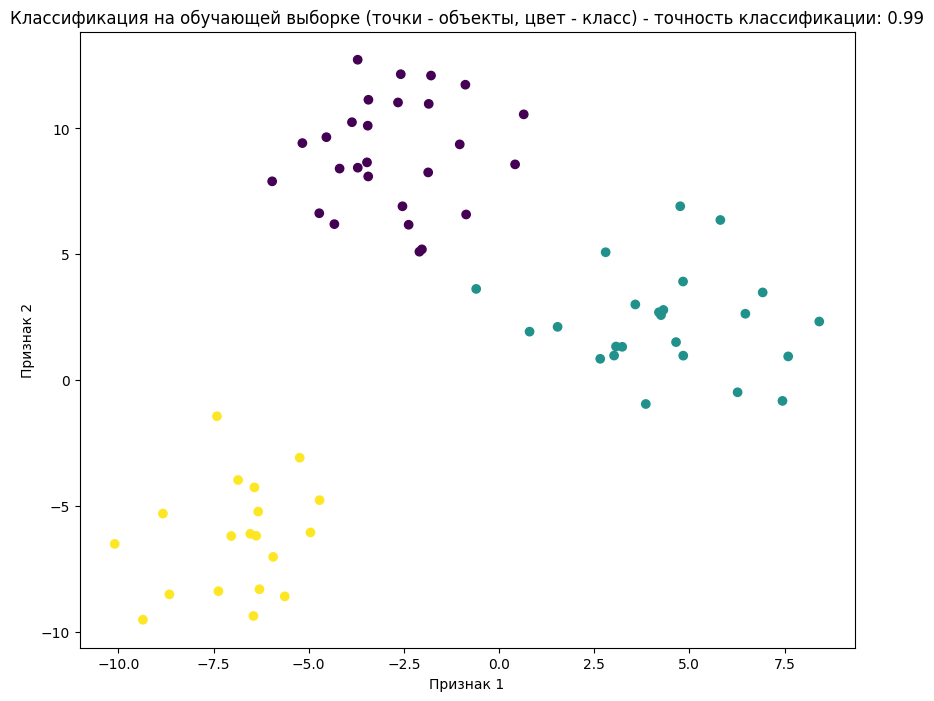

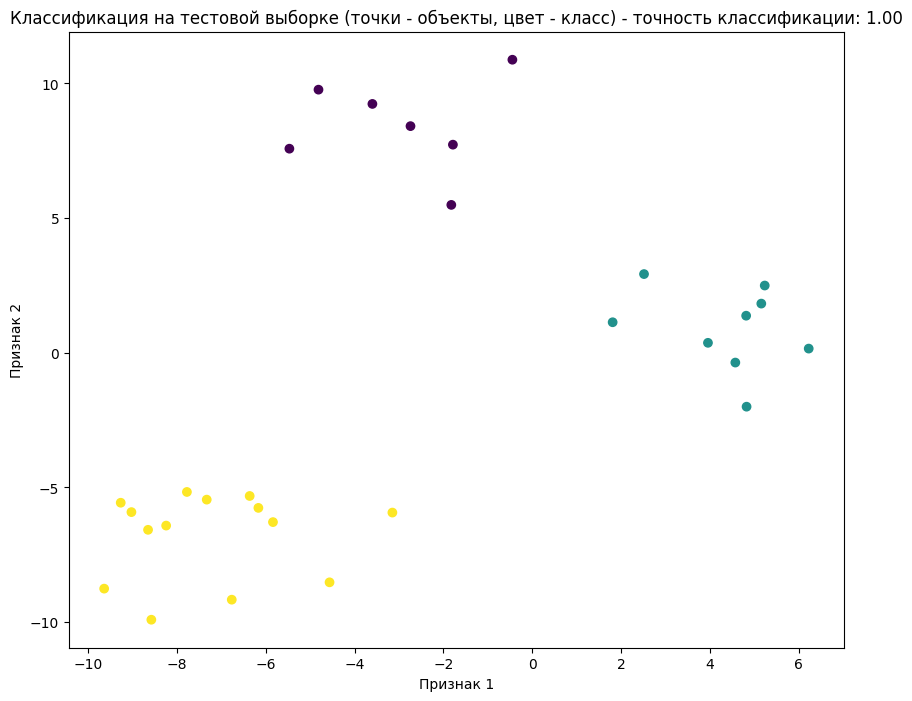

In [390]:
# Визуализация результатов классификации на обучающей выборке
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Классификация на обучающей выборке (точки - объекты, цвет - класс) - точность классификации: {:.2f}'.format(train_accuracy))
plt.show()

# Визуализация результатов классификации на тестовой выборке
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Классификация на тестовой выборке (точки - объекты, цвет - класс) - точность классификации: {:.2f}'.format(test_accuracy))
plt.show()

# Динамически закрасить не получилось...

[Text(0.6, 0.8333333333333334, 'x[0] <= 0.726\ngini = 0.66\nsamples = 70\nvalue = [27, 24, 19]'),
 Text(0.4, 0.5, 'x[1] <= 4.356\ngini = 0.506\nsamples = 47\nvalue = [27, 1, 19]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.095\nsamples = 20\nvalue = [0, 1, 19]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]')]

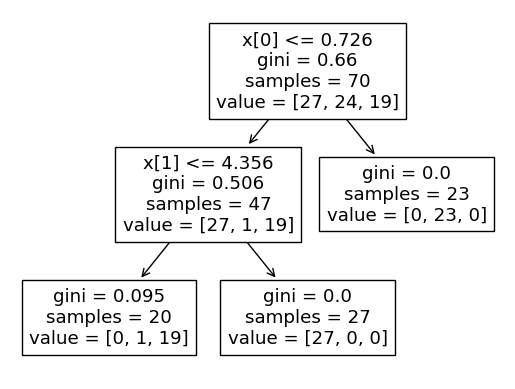

In [391]:
tree.plot_tree(clf)

Точность классификации на обучающей выборке составила 0.9857142857142858, а на тестовой выборке - 1.0.

Модель решающего дерева с параметром max_depth=2 и random_state=42 показала хорошие результаты на обучающей выборке и на тестовой выборке.

4) Создать модель решающего дерева глубиной 3 и повторить с ней все действия, описанные для дерева глубины 1.

In [392]:
# Создание модели решающего дерева глубиной 3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Обучение модели на обучающей выборке
clf.fit(X_train, y_train)

# Получение предсказаний для тестовой выборки
y_pred = clf.predict(X_test)

# Оценка качества классификации на обучающей выборке
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Точность классификации на обучающей выборке:", train_accuracy)

# Оценка качества классификации на тестовой выборке
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Точность классификации на тестовой выборке:", test_accuracy)

Точность классификации на обучающей выборке: 1.0
Точность классификации на тестовой выборке: 1.0


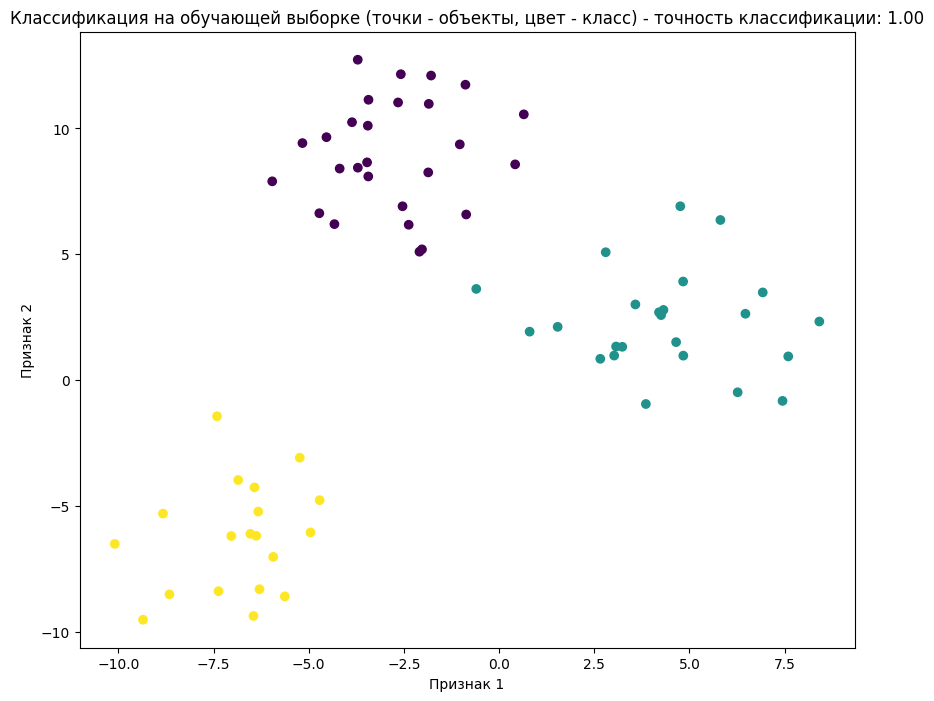

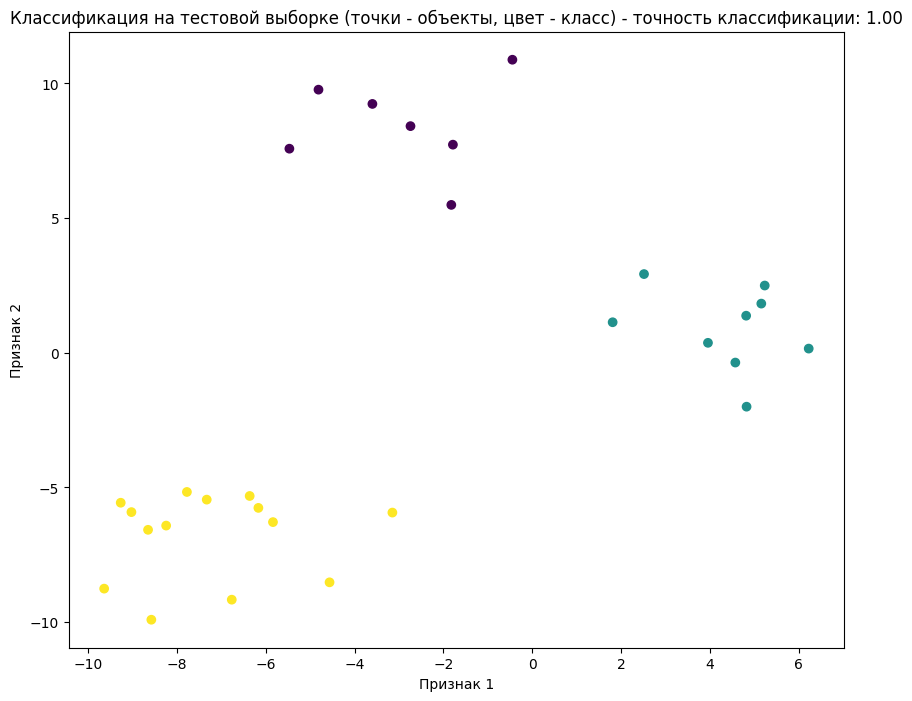

In [393]:
# Визуализация результатов классификации на обучающей выборке
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Классификация на обучающей выборке (точки - объекты, цвет - класс) - точность классификации: {:.2f}'.format(train_accuracy))
plt.show()

# Визуализация результатов классификации на тестовой выборке
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Классификация на тестовой выборке (точки - объекты, цвет - класс) - точность классификации: {:.2f}'.format(test_accuracy))
plt.show()

# Динамически закрасить не получилось...

[Text(0.6666666666666666, 0.875, 'x[0] <= 0.726\ngini = 0.66\nsamples = 70\nvalue = [27, 24, 19]'),
 Text(0.5, 0.625, 'x[1] <= 4.356\ngini = 0.506\nsamples = 47\nvalue = [27, 1, 19]'),
 Text(0.3333333333333333, 0.375, 'x[1] <= 1.089\ngini = 0.095\nsamples = 20\nvalue = [0, 1, 19]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 19]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]')]

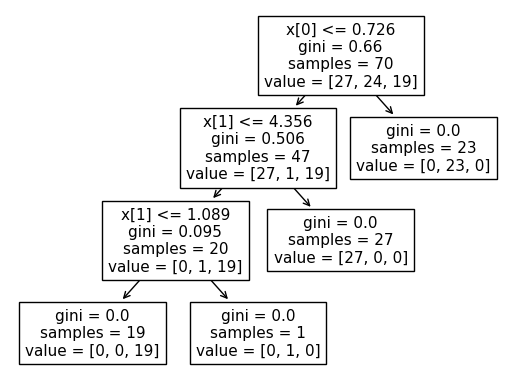

In [394]:
tree.plot_tree(clf)

Точность классификации на обучающей выборке и на тестовой выборке равна 1.0, то это означает, что модель классификации получилась наилучшим образом

7. Проанализировать все результаты, полученные в п. 5 и 6. Сделать выводы. Создать отчет: описание и оценка качества каждой модели, выводы по результатам исследования.

**Модель решающего дерева глубиной 1:**

  Точность классификации на обучающей выборке: 0.7142857142857143

  Точность классификации на тестовой выборке: 0.5333333333333333

**Модель решающего дерева глубиной 2:**

  Точность классификации на обучающей выборке: 0.9857142857142858

  Точность классификации на тестовой выборке: 1.0 


**Модель решающего дерева глубиной 3:**

  Точность классификации на обучающей выборке: 1.0

  Точность классификации на тестовой выборке: 1.0

**Вывод:**

Модель решающего дерева с глубиной 1 показала хорошие результаты на обучающей выборке, но не показала идеальные результаты на тестовой выборке.

Модель решающего дерева с глубиной 2 показала хорошие результаты на обучающей и тестовой выборках.

Модель решающего дерева с глубиной 3 показала идеальные результаты на обучающей и тестовой выборках.

8. Создать модель решающего дерева с ограничением на число объектов в листе (задать не более 3 объектов). Обучить эту модель на обучающей выборке. Получить предсказанные моделью метки классов для объектов обучающей и тестовой выборок. Оценить качество классификации с помощью метрики accuracyна обучающей и тестовой выборках.Сопоставить результаты с полученными в п. 5 и 6, сделать выводы и добавить их в отчет.

In [395]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=42)

In [396]:
# Получение предсказаний для тестовой выборки
y_pred = clf.predict(X_test)

# Оценка качества классификации на обучающей выборке
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Точность классификации на обучающей выборке:", train_accuracy)

# Оценка качества классификации на тестовой выборке
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Точность классификации на тестовой выборке:", test_accuracy)

Точность классификации на обучающей выборке: 1.0
Точность классификации на тестовой выборке: 1.0


[Text(0.6666666666666666, 0.875, 'x[0] <= 0.726\ngini = 0.66\nsamples = 70\nvalue = [27, 24, 19]'),
 Text(0.5, 0.625, 'x[1] <= 4.356\ngini = 0.506\nsamples = 47\nvalue = [27, 1, 19]'),
 Text(0.3333333333333333, 0.375, 'x[1] <= 1.089\ngini = 0.095\nsamples = 20\nvalue = [0, 1, 19]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 19]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]')]

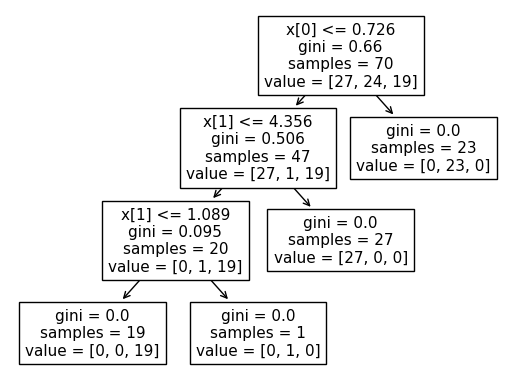

In [397]:
tree.plot_tree(clf)


Модель решающего дерева показала идеальные результаты на обучающей и тестовой выборках.